In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [3]:
data = pd.read_csv('Passanger_booking_data.csv')
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [10]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [4]:
data.shape

(50002, 14)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [8]:
data.describe(include='object')

,sales_channel,trip_type,flight_day,route,booking_origin
count,50002,50002,50002,50002,50002
unique,2,3,7,799,104
top,Internet,RoundTrip,Mon,AKLKUL,Australia
freq,44383,49498,8102,2680,17873


In [6]:
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [22]:
def my_boxplot(x: pd.Series, y: pd.Series):
    fig = plt.figure()
    fig.set_size_inches(9, 6)
    sns.boxplot(y=y, x=x)
    plt.show()

def my_countplot(df: pd.DataFrame, column: str):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df, hue='booking_complete')
    plt.title(f'Гистограмма для {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.show()

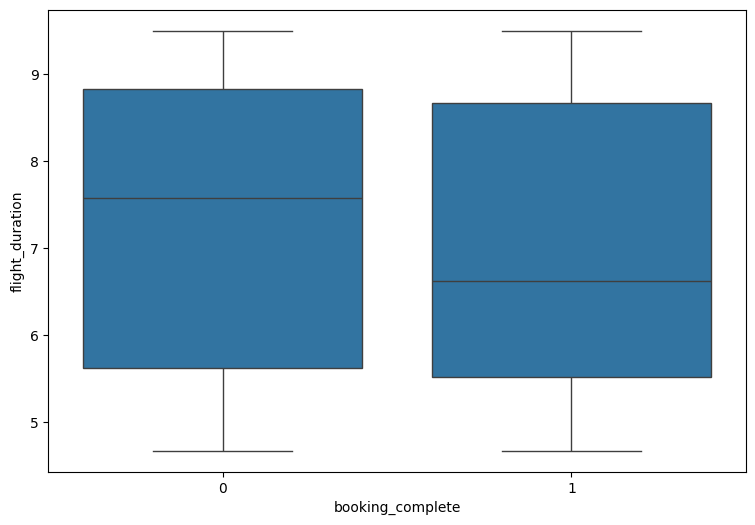

In [23]:
my_boxplot(y=data['flight_duration'], x=data['booking_complete'])

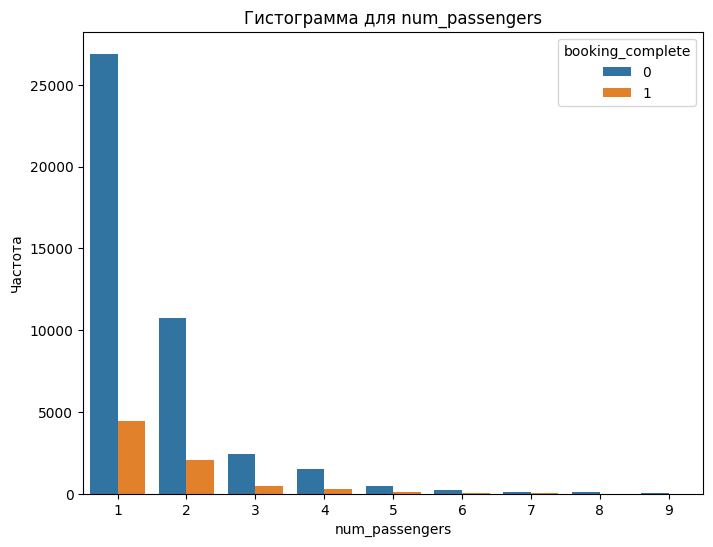

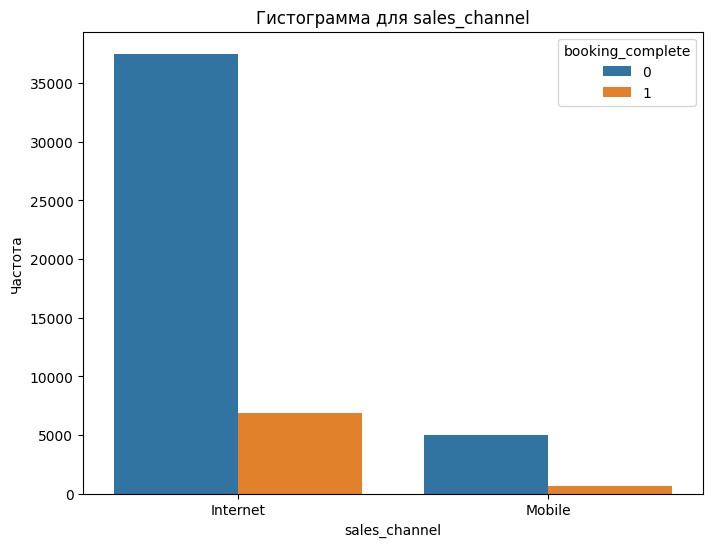

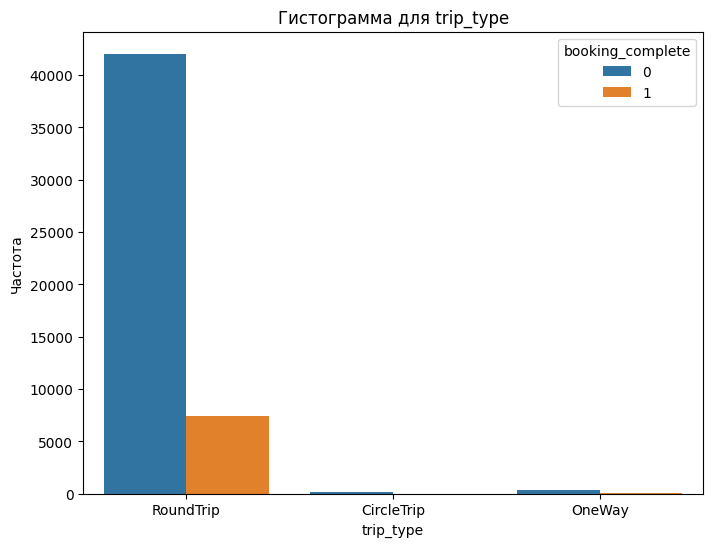

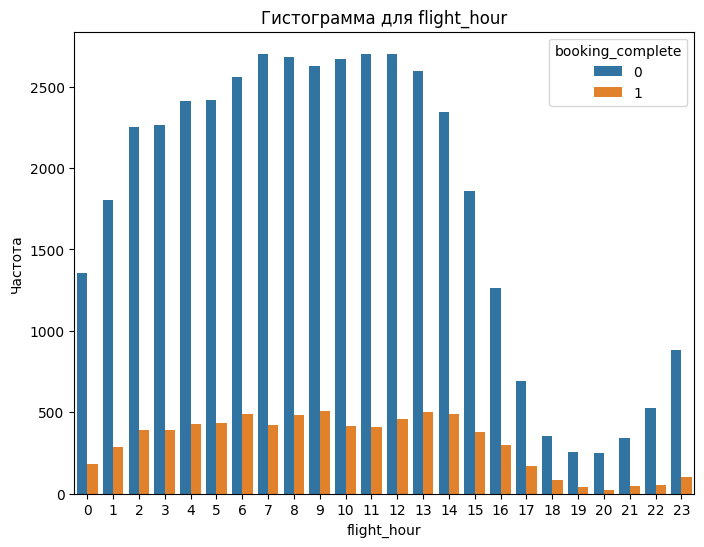

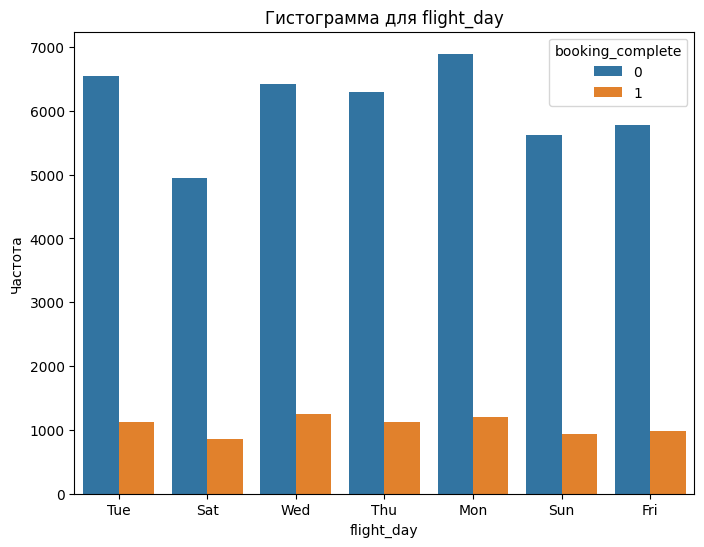

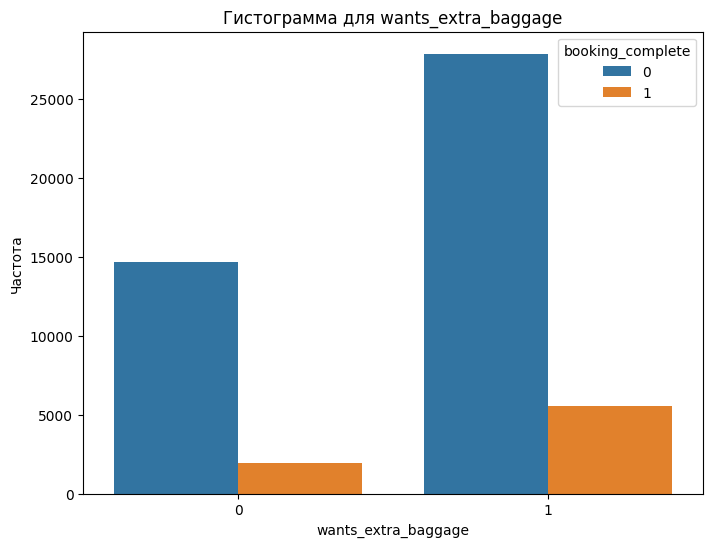

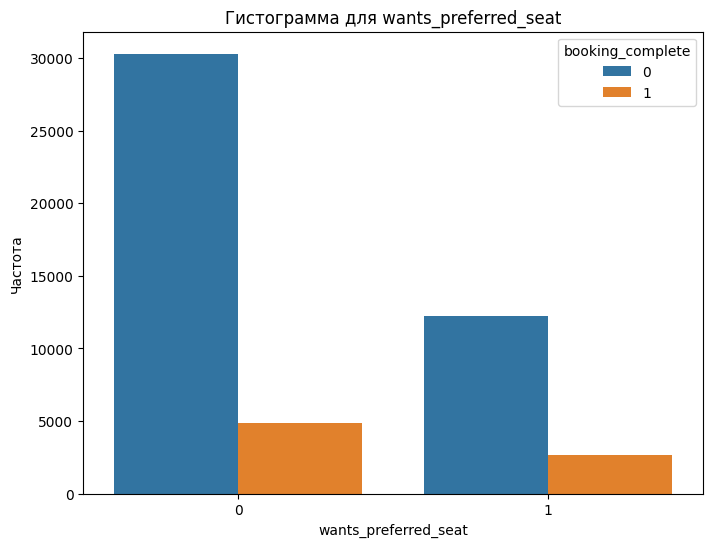

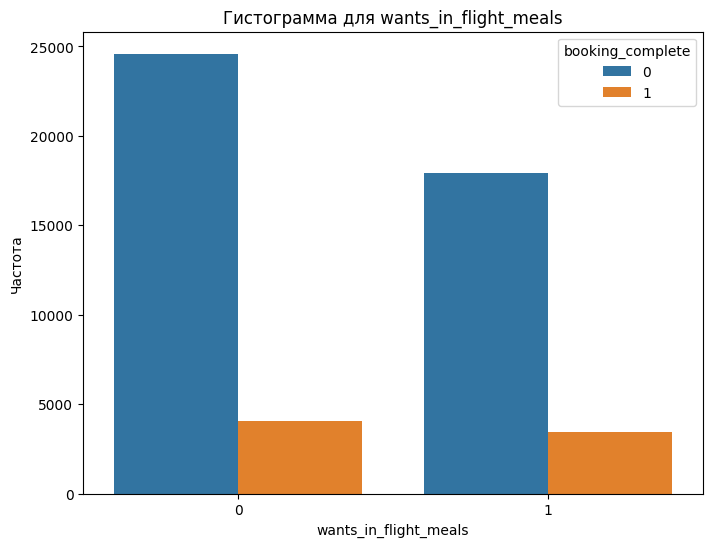

In [25]:
col_for_hist = ['num_passengers', 'sales_channel', 'trip_type','flight_hour', 'flight_day','wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals']
for col in col_for_hist:
    my_countplot(df=data, column=col)

In [35]:
top_origin_countries = data['booking_origin'].value_counts()
top_origin_countries[top_origin_countries > 100]
# возьмем страны, кол-во которых больше 100, а остальные занесем в категорию Other

booking_origin
Australia         17873
Malaysia           7174
South Korea        4559
Japan              3885
China              3387
Indonesia          2369
Taiwan             2077
Thailand           2030
India              1270
New Zealand        1074
Singapore          1044
United States       456
Vietnam             388
Macau               304
Hong Kong           295
Philippines         266
United Kingdom      173
Brunei              167
Cambodia            132
Name: count, dtype: int64

In [50]:
def clear_outlier(data: pd.DataFrame, feature: str) -> pd.DataFrame:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data_filtered = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

In [51]:
def numeric_analyze(target: str, feature: str, data: pd.DataFrame):
    sns.boxplot(x=target, y=feature, data=data)
    plt.show()
    
    sns.histplot(data=data, x=feature, hue=target, kde=True)
    plt.show()
    
    sns.kdeplot(data=data, x=feature, hue=target, fill=True)
    plt.show()

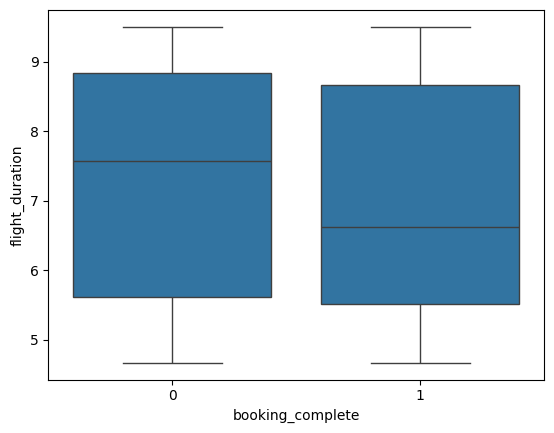

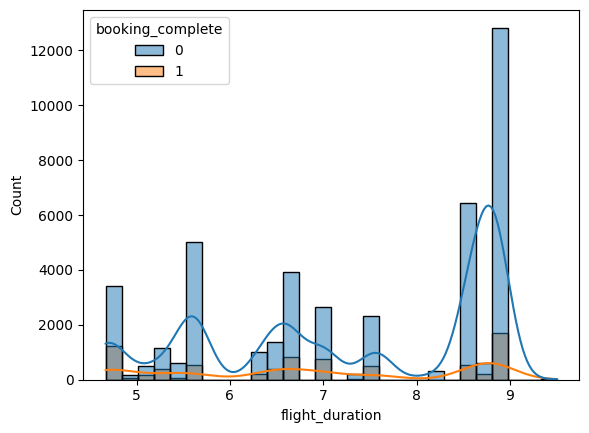

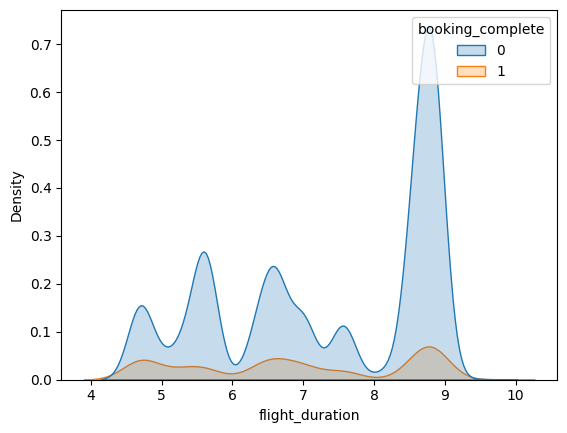

In [54]:
numeric_analyze(target='booking_complete', feature='flight_duration', data=data)

In [ ]:
# num_paccengers - оставляем пока в числовых(хотя по факту категориальный)
# sales chanel - категориальный
# circle trip - удаляем
# flight hour - разделить на интервалы по 6 часов и категориальный
# weekday - категориальная 
# 3 wants признака - бинарные
# flight  duration - категориальный, можно разделить на 3 группы
# route - удалим

In [58]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [59]:
data_to_process = data.copy()

In [61]:
data_to_process.drop(columns=['trip_type', 'route'], inplace=True)

In [71]:
data_to_process.head()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,time
0,1,Internet,21,12,Tue,Australia,0,0,0,7.21,1,Morning
1,2,Internet,262,19,Sat,New Zealand,1,0,0,5.52,0,Morning
2,1,Internet,112,20,Sat,New Zealand,0,0,0,5.52,0,Night
3,2,Internet,243,22,Wed,India,1,1,0,5.52,0,Noon
4,1,Internet,96,31,Sat,New Zealand,0,0,1,5.52,0,Night


In [66]:
intervals = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Noon', 'Evening']
data_to_process['time'] = pd.cut(data['flight_hour'], bins=intervals, labels=labels, right=False)
data_to_process.drop(columns=['flight_hour'], inplace=True)

In [73]:
top_origin_countries
small_countries_index = top_origin_countries[top_origin_countries < 100].index.tolist()
data_to_process.loc[data_to_process['booking_origin'].isin(small_countries_index), 'booking_origin'] = 'Other'
data_to_process['booking_origin'].value_counts()

booking_origin
Australia         17873
Malaysia           7174
South Korea        4559
Japan              3885
China              3387
Indonesia          2369
Taiwan             2077
Thailand           2030
India              1270
Other              1079
New Zealand        1074
Singapore          1044
United States       456
Vietnam             388
Macau               304
Hong Kong           295
Philippines         266
United Kingdom      173
Brunei              167
Cambodia            132
Name: count, dtype: int64

In [ ]:
cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped']
df_cat = all_data[cat_features]
df_cat = df_cat.astype('category')
df_encoded = pd.get_dummies(df_cat)

df_all = pd.concat([all_data, df_encoded], axis=1)
df_all = df_all.drop(cat_features, axis=1)
df_all.shape

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

for model in models:
    print(f'MODEL-------', model)
    y_pred = model.predict(X_train)
    print(f'Accuracy: {accuracy_score(y_train, y_pred):.3f}' )
    print(f'Precision: {precision_score(y_train, y_pred):.3f}' )
    print(f'Recall: {recall_score(y_train, y_pred):.3f}' )
    print(f'F-мера: {f1_score(y_train, y_pred):.3f}' )

In [ ]:
param_grid = {
    'Tree__max_depth': np.linspace(1, 10, 10, dtype=int)
}

splitter = KFold(n_folds, shuffle=True, random_state=42)
search = GridSearchCV(forest, param_grid, 
                      cv=splitter)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

In [ ]:
# logistic.fit(X=X_train, y=y_train)
# svm.fit(X=X_train, y=y_train)
knn.fit(X=X_train, y=y_train)
tree.fit(X_train, y=y_train)
forest.fit(X_train, y=y_train)

In [ ]:
n_folds = 5

def acc_cv(model):
    splitter = KFold(n_folds, shuffle=True, random_state=42)
    cv_result_pipe = cross_validate(estimator=model, X=X_train, y=y_train, 
                                 scoring='accuracy',
                                 cv=splitter, return_train_score=True)
    print(model)
    print(f"Среднее accuracy на тренировочных фолдах: {np.mean(cv_result_pipe['train_score']).round(3)}")
    print(f"Среднее accuracy на тестовых фолдах: {np.mean(cv_result_pipe['test_score']).round(3)}")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import KFold, cross_validate, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

logistic = Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression(penalty='none'))])
svm = Pipeline([('Scaler', StandardScaler()), ('SVM', LinearSVC())])
knn = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier(n_neighbors=19, p=1, weights='uniform'))])
tree = Pipeline([('Scaler', StandardScaler()), ('Tree', DecisionTreeClassifier(max_depth=4))])
forest = Pipeline([('Scaler', StandardScaler()), ('Tree', RandomForestClassifier(max_depth=6))])